# Tutorial to read in CANDELS data and plot figures

In [1]:
## set paths to catalog/script files and output directories (for plots)
data_dir = '../hdf5files/'
script_dir = './'
out_dir = './'

In [2]:
## load plotting routines
execfile(script_dir+'plot_routines.py')

## Read in and setup data for plotting

### GOODS-S

In [3]:
## read in catalog for GOODS-S 
gds = Table.read(data_dir+'gds.hdf5')

/Users/Andy/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# define selection cuts for GOODS-S

## F160W < 24.5 mag
## SE flag (PhotFlag) = 0
## CLASS_STAR < 0.9
## redshifts between 0.2 and 2.5
## masses between 9 and 11
## GALFIT flag = 0 (will not use)
print gds['M_med']
gds_selection = np.where( \
                      (gds['mag_f160w']<24.5) &\
                      (gds['PhotFlag']==0) & \
                      (gds['CLASS_STAR']<0.9) & \
                      (gds['z_best']>0.5) & (gds['z_best']<2.5) & \
                      (gds['M_med']>9.0) & (gds['M_med']<11.0))

M_med
-----
10.43
 9.98
 8.89
 8.79
10.24
 9.39
 9.76
 8.55
 8.61
 8.63
  ...
 9.06
 8.73
 9.56
 8.62
 7.32
 7.18
 8.24
 7.41
 9.23
  8.4
 8.72
Length = 34930 rows


In [5]:
#print gds_selection

In [6]:
## define new structure with only selected objects
gds_final = gds[gds_selection]
#print gds_final
#print(gds_final[0])

In [7]:
## define variables for GOODS-S

u_gds = gds_final['restUXbessel']  ## rest-frame U magnitude
v_gds = gds_final['restVbessel']   ## rest-frame V magnitude
j_gds = gds_final['restJpalomar']  ## rest-frame J magnitude

uv_gds = u_gds - v_gds
vj_gds = v_gds - j_gds

#uvprime_gds = gds_final['uvrot'] ## (U-V)' color
#vjprime_gds = gds_final['vjrot'] ## (V-J)' color

#mstar_gds = math.log10(gds_final['M_med']) ## log (median) stellar mass (in M_sun)
mstar_gds = gds_final['M_med'] # already logged?
z_gds = gds_final['z_best']  ## redshift

#ssfr_gds = gds_final['ssfr_uv_corr'] ## log specific SFR (UV,corr)
#sf_flag_gds = gds_final['sf_flag'] ## -1 if quiescent, 1 if star-forming, acc to UVJ
#delssfr_gds = gds_final['delta_ssfr'] ## Delta log SSFR
#av_gds = gds_final['med_av'] ## (median) visual attenuation (in mag)

#sma_gds = math.log10(gds_final['sma_f160w_kpc']) ## log SMA (in kpc)
#delsma_gds = gds_final['delta_sma']  ## Delta log SMA
#n_gds = gds_final['n_f160w']  ## Sersic index n
#ba_gds = gds_final['q_f160w'] ## axis ratio b/a

# EGS

In [8]:
egs = Table.read(data_dir+'egs.hdf5')

In [9]:
egs_selection = np.where( \
                      (egs['PhotFlag']==0) & \
                      (egs['CLASS_STAR']<0.9) & \
                      (egs['z_best']>0.2) & (egs['z_best']<2.5) & \
                      (egs['M_med']>9.0) & (egs['M_med']<11.0))

In [10]:
egs_final = egs[egs_selection]
#print(egs[0])

In [11]:
## define variables for egs

u_egs = egs_final['restUXbessel']  ## rest-frame U magnitude
v_egs = egs_final['restVbessel']   ## rest-frame V magnitude
j_egs = egs_final['restJpalomar']  ## rest-frame J magnitude

uv_egs = u_egs - v_egs
vj_egs = v_egs - j_egs

# uvprime_egs = egs_final['uvrot'] ## (U-V)' color
# vjprime_egs = egs_final['vjrot'] ## (V-J)' color

mstar_egs = (egs_final['M_med']) ## log (median) stellar mass (in M_sun)
z_egs = egs_final['z_best']  ## redshift

# ssfr_egs = egs_final['ssfr_uv_corr'] ## log specific SFR (UV,corr)
# sf_flag_egs = egs_final['sf_flag'] ## -1 if quiescent, 1 if star-forming, acc to UVJ
# delssfr_egs = egs_final['delta_ssfr'] ## Delta log SSFR
# av_egs = egs_final['med_av'] ## (median) visual attenuation (in mag)

# sma_egs = (egs_final['sma_f160w_kpc']) ## log SMA (in kpc)
# delsma_egs = egs_final['delta_sma']  ## Delta log SMA
# n_egs = egs_final['n_f160w']  ## Sersic index n
# ba_egs = egs_final['q_f160w'] ## axis ratio b/a

### Join GOODS-S and UDS variables together to be able to plot both at the same time

In [12]:
uv = np.concatenate([u_gds-v_gds,u_egs-v_egs])
vj = np.concatenate([v_gds-j_gds,v_egs-j_egs])

# uvprime = concatenate([uvprime_gds,uvprime_egs])
# vjprime = concatenate([vjprime_gds,vjprime_egs])

mass = np.concatenate([mstar_gds,mstar_egs])
redshift = np.concatenate([z_gds,z_egs])

# ssfr = concatenate([ssfr_gds,ssfr_egs])
# sf_flag = concatenate([sf_flag_gds,sf_flag_egs])
# delssfr = concatenate([delssfr_gds,delssfr_egs])
# av = concatenate([av_gds,av_egs])

# sma = concatenate([sma_gds,sma_egs])
# delsma = concatenate([delsma_gds,delsma_egs])
# sersic = concatenate([n_gds,n_egs])
# ba = concatenate([ba_gds,ba_egs])

## Example plots

### $UVJ$ Diagram for whole sample

Text(0,0.5,'U-V')

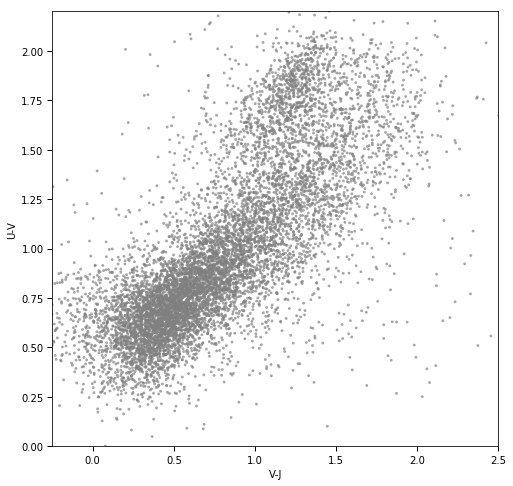

In [13]:
fig=plt.figure(figsize=(8,8))
plt.scatter(vj,uv,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.25,2.5)
plt.ylim(0,2.2)
plt.xlabel('V-J')
plt.ylabel('U-V')

### $UVJ$ grid diagram

To make a grid of panels (mass and redshift bins), use the plot_grid command

The 4 required arguments are: xdata, ydata, mass, redshift

The remaining arguments are "optional", but important to specify axis ranges, labels, color-coding

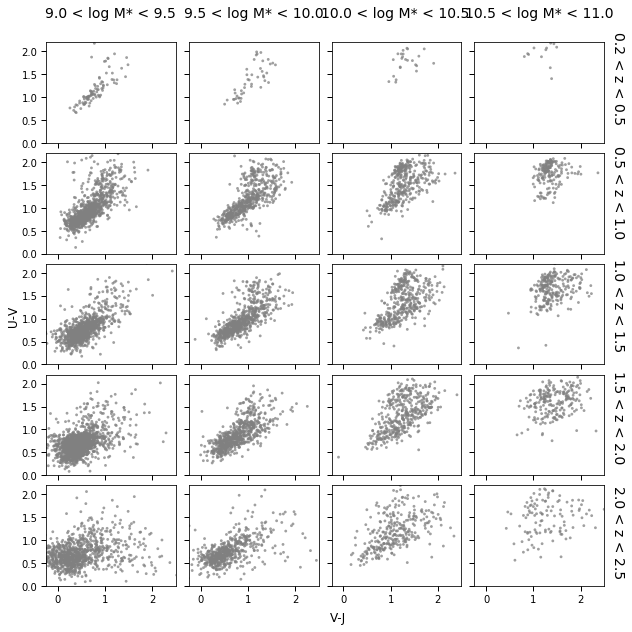

In [14]:
ax = plot_grid(vj,uv,mass,redshift,\
               xmin=-0.25,xmax=2.5,xlabel='V-J',\
               ymin=0,ymax=2.2,ylabel='U-V')

To color-code points, use the zdata argument, and set associated parameters

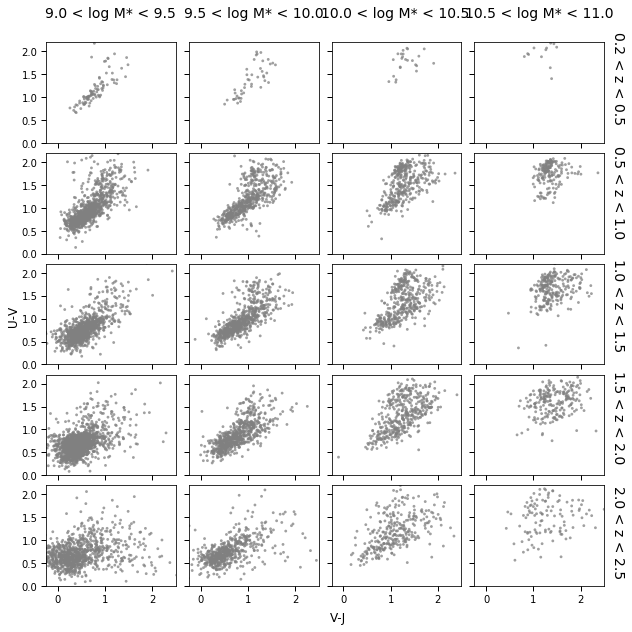

In [15]:
ax = plot_grid(vj,uv,mass,redshift,\
               xmin=-0.25,xmax=2.5,xlabel='V-J',\
               ymin=0,ymax=2.2,ylabel='U-V',\
               zmin=-10.7,zmax=-8,zlabel='log SSFR',cmap=nipy_r)

You can also generate binned (pixelated) versions of the diagram by setting binned=True (default is 20 bins along x and y)

Each pixel gives the median value of the z-parameter in that pixel

Optionally, specify the number of bins along the x and y axes by setting nxbins=N and nybins=N

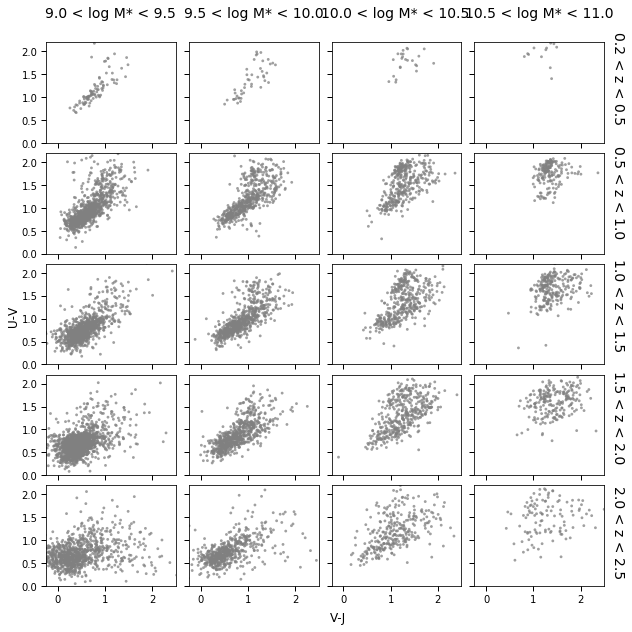

In [16]:
ax = plot_grid(vj,uv,mass,redshift,\
               xmin=-0.25,xmax=2.5,xlabel='V-J',\
               ymin=0,ymax=2.2,ylabel='U-V',\
               zmin=-10.7,zmax=-8,zlabel='log SSFR',cmap=nipy_r,\
               binned=True)

You can plot data satisfying specific criteria by setting the "condition" argument

When specifying multiple conditions, surround each with parentheses and link with &

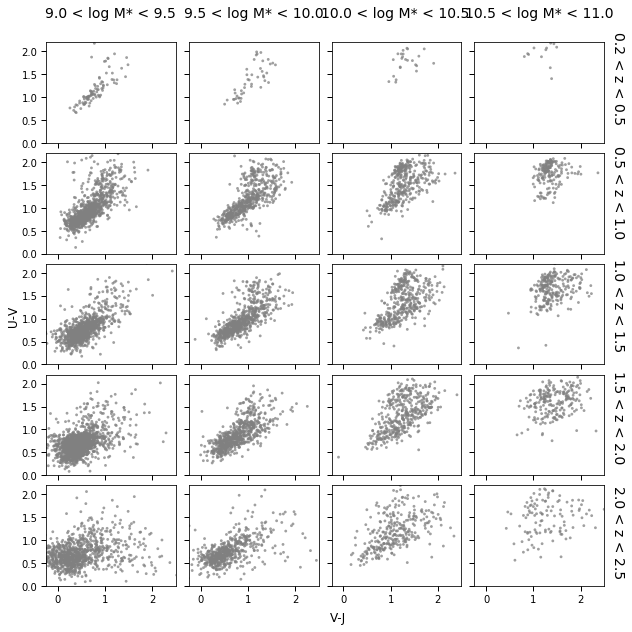

In [17]:
## Only plot galaxies that are "round" (b/a>0.5) and star-forming (sf_flag=1)
ax = plot_grid(vj,uv,mass,redshift,\
               xmin=-0.25,xmax=2.5,xlabel='V-J',\
               ymin=0,ymax=2.2,ylabel='U-V',\
               zmin=-10.7,zmax=-8,zlabel='log SSFR',cmap=nipy_r)

### Other test plots

In [18]:
ax = plot_grid(delsma,delssfr,mass,redshift,\
               xmin=-0.6,xmax=0.6,xlabel='Delta SMA',\
               ymin=-1.5,ymax=1.2,ylabel='Delta SSFR',\
               zdata=av,zmin=0,zmax=2.3,zlabel='A_V',cmap=nipy,\
               condition=((sf_flag==1)) )

## you can plot lines in each panel using add_line
xx=linspace(-1,1,10)
add_line(ax,xx,xx*0-0.4,c='r',ls='--')

NameError: name 'delsma' is not defined

In [ ]:
ax = plot_grid(delsma,ba,mass,redshift,\
               xmin=-0.6,xmax=0.6,xlabel='Delta SMA',\
               ymin=0,ymax=1.1,ylabel='Axis ratio b/a',\
               zdata=av,zmin=0,zmax=2.3,zlabel='A_V',cmap=nipy,\
               condition=((sf_flag==1) & (delssfr>-0.4)) )

savefig('/Users/Andy/Desktop/test.pdf')